In [1]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

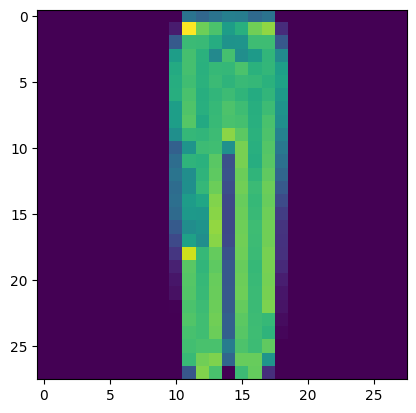

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1000])

In [7]:
y_train[1000]

1

In [8]:
#we have to convert into grayscale

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [9]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
X_train=X_train/255   # noramlise
X_test=X_test/255

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten,Dense

In [13]:
model=Sequential()       
model.add(Conv2D(32,(3,3),2,activation='relu',input_shape=(28,28,1)))   #stride 2 below
model.add(MaxPool2D((2,2),strides=2))  # strides 2
model.add(Conv2D(32,(3,3),2,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [15]:
model.fit(X_train,y_train,batch_size=6000,epochs=7)

Epoch 1/7
10/10 [==============================] - 15s 35ms/step - loss: 2.2816 - accuracy: 0.2540
Epoch 2/7
10/10 [==============================] - 0s 23ms/step - loss: 2.2094 - accuracy: 0.3726
Epoch 3/7
10/10 [==============================] - 0s 20ms/step - loss: 2.0418 - accuracy: 0.4261
Epoch 4/7
10/10 [==============================] - 0s 21ms/step - loss: 1.7451 - accuracy: 0.4992
Epoch 5/7
10/10 [==============================] - 0s 21ms/step - loss: 1.4097 - accuracy: 0.5827
Epoch 6/7
10/10 [==============================] - 0s 20ms/step - loss: 1.1527 - accuracy: 0.6486
Epoch 7/7
10/10 [==============================] - 0s 22ms/step - loss: 0.9812 - accuracy: 0.6897


In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9330 - accuracy: 0.6953


[0.9330291748046875, 0.6952999830245972]

In [17]:
# for predicion 

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [18]:
def load_image(filename):
  img=load_img(filename,grayscale=True,target=(28,28))
  img=img_to_array(img)
  img=img.reshape(1,28,28,1)
  img=img/255
  return img